In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from collections import Counter

In [2]:
df = pd.read_csv("Datos_regresion.csv") # read in data downloaded to the local directory
df.head()

,Edad,Diag.Ing1,Diag.Ing2,Diag.Egr1,Diag.Egr2,APACHE,TiempoVAM,Fallece
0,35,1,0,1,0,10,2,0
1,87,2,0,2,0,16,2,0
2,70,4,0,4,0,11,2,0
3,24,13,0,13,5,11,2,0
4,24,3,0,3,0,17,3,0


In [3]:
# Se crea un nuevo dataset con los datos de forma tal que puedan ser procesados por el algoritmo
df_new = df[["Edad", "APACHE", "TiempoVAM"]]
lista = ["Diag.Ing1", "Diag.Ing2", "Diag.Egr1", "Diag.Egr2"]
for i in lista:
    new = pd.get_dummies(df[i], prefix=i)
    df_new = pd.concat([df_new , new], axis = 1)
df_new = pd.concat([df_new , df.Fallece], axis =1)
df = df_new
df.head()

,Edad,APACHE,TiempoVAM,Diag.Ing1_1,Diag.Ing1_2,Diag.Ing1_3,Diag.Ing1_4,Diag.Ing1_5,Diag.Ing1_6,Diag.Ing1_7,...,Diag.Egr2_21,Diag.Egr2_22,Diag.Egr2_23,Diag.Egr2_24,Diag.Egr2_25,Diag.Egr2_27,Diag.Egr2_33,Diag.Egr2_34,Diag.Egr2_36,Fallece
0,35,10,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,16,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70,11,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,11,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,17,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Tomamos un dato para predecir su probabilidad de morir
x_pred_f = df.loc[df.Fallece == 1]
x_pred_f = x_pred_f[1:2]
x_pred_f = x_pred_f.drop("Fallece", axis =1)

In [5]:
# Tomamos un dato para predecir su probabilidad de vivir
x_pred_v = df.loc[df.Fallece == 0]
x_pred_v = x_pred_v[:1]
x_pred_v = x_pred_v.drop("Fallece", axis =1)

In [6]:
print(df.shape)
print(pd.value_counts(df['Fallece'], sort = True))

(208, 117)
0    176
1     32
Name: Fallece, dtype: int64


Text(0, 0.5, 'Number of Observations')

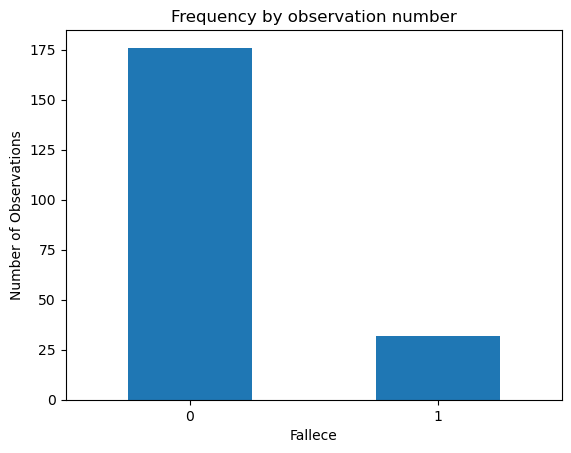

In [7]:
count_classes = pd.value_counts(df['Fallece'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Fallece")
plt.ylabel("Number of Observations")

In [8]:
#definimos nuestras etiquetas y features
y = df['Fallece']
X = df.drop('Fallece', axis=1)

In [9]:
# Se realiza el OVerSampling
os =  RandomOverSampler(random_state=42)
X_train_res, y_train_res = os.fit_resample(X, y)
print ("Distribution before resampling {}".format(Counter(y)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 176, 1: 32})
Distribution labels after resampling Counter({0: 176, 1: 176})


In [10]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, train_size=0.8, random_state=42)

In [11]:
# Se aplica el algorimo de Regresion Logistica
clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
# Resultado del algorimo: [probabilidad de que viva: probabilidad de que muera]
prob = clf.predict_proba(X)
np.savetxt("prob.csv", prob, delimiter=',')

In [13]:
# Resultado del algorimo: [probabilidad de que viva: probabilidad de que muera]
prob = clf.predict_proba(x_pred_v)
prob

array([[0.94086473, 0.05913527]])

In [14]:
# Metricas
val_mae = mean_absolute_error(y_test , y_pred)
print("Validation MAE: {}".format(val_mae))

val_mse = mean_squared_error(y_test , y_pred)
print("Validation MSE: {}".format(val_mse))

val_rmse = mean_squared_error(y_test , y_pred, squared=False)
print("Validation RMSE: {}".format(val_rmse))

Validation MAE: 0.14084507042253522
Validation MSE: 0.14084507042253522
Validation RMSE: 0.37529331252040077


In [15]:
# Cross Validation
print(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

0.8469047619047618


# MLP REGRESSOR

In [16]:
# Se aplica un MLP Regressor
nn=MLPRegressor(activation='logistic',solver='sgd',hidden_layer_sizes=(120, 40),random_state=1)
nn.fit(X_train, y_train)
nn_pred=nn.predict(X_test)

In [17]:
# Metricas
print(f"MAE: {mean_absolute_error(y_test, nn_pred)}")
print(f"MSE: {mean_squared_error(y_test, nn_pred)}")
print(f"MSE: {mean_squared_error(y_test, nn_pred, squared=False)}")

MAE: 0.49941487530052975
MSE: 0.25376807944314594
MSE: 0.5037539870245653
